In [1]:
# from jupyter_plotly_dash import JupyterDash

In [1]:
from jupyter_dash import JupyterDash

In [3]:
JupyterDash.infer_jupyter_proxy_config()

OSError: Unable to communicate with the jupyter_dash notebook or JupyterLab 
extension required to infer Jupyter configuration.

In [3]:
from dash.dependencies import Input, Output, State
import dash_core_components as dcc
import dash_html_components as html

In [4]:
from sys import exc_info

In [6]:
app = JupyterDash("hi",
#                   width=300, height=200
                 )
app.layout = html.Div([
    dcc.Input(id="input",value="ha"),
    html.Div(id="output",children="--"),
],style={"border":"thin grey solid"})

app.callback(
    Output("output","children"),
    [Input("input","value")]
)
def mycall(x):
    try:
        if x is not None:
            return x
    except:
        return str(exc_info())

app

In [7]:
app.run_server(mode="inline")

In [7]:
app.layout

Div([Input(id='input', value='ha'), Div(id='output')])

In [1]:
import numpy as np

In [ ]:
np.corr

In [ ]:
"/data/Sandra/"

In [1]:
%matplotlib notebook

In [2]:
import bqplot as bq
import numpy as np
import ipywidgets as widgets


def calcSlope(num_points, slope):
    a = np.linspace(0, 9, num_points)
    b = a * slope

    line1.x = a
    line1.y = b


def calcXY(num_points, randNum):
    x = np.linspace(3, 9, num_points)
    y = x

    #add randomness to scatter
    x = np.random.uniform(low=1-randNum/100, high=1+ randNum/100, size=(len(x))) * x
    y = np.random.uniform(low=1-randNum/100, high=1+ randNum/100, size=(len(y))) * y

    #format & plot the figure
    x_sc.min = x.min()
    x_sc.max = x.max() + 1

    scat.x = x
    scat.y = y        



def rand_int(rand):
    calcXY(num_i.children[0].value, rand)

def num_points_int(num_points):
    calcXY(num_points, rand_i.children[0].value)
    calcSlope(num_points, slope_i.children[0].value)

def slope_int(slope):
    calcSlope(num_i.children[0].value, slope)



rand_i = widgets.interactive(rand_int, 
                 rand = widgets.FloatSlider(
                                value=3,
                                min=0,
                                max=50,
                                step=3,
                                description='Randomness:', num_points=(10, 50, 5)
                                )
                              )


num_i = widgets.interactive(num_points_int, 
                 num_points = widgets.IntSlider(
                                value=20,
                                min=10,
                                max=50,
                                step=5,
                                description='Number of points:'
                                )
                              )


slope_i = widgets.interactive(slope_int, 
                 slope=widgets.FloatSlider(
                                value=1,
                                min=-1,
                                max=5,
                                step=0.1,
                                description='Slope'
                                )
                              )


# Create the initial bqplot figure
x_sc = bq.LinearScale()
ax_x = bq.Axis(label='X', scale=x_sc, grid_lines='solid', tick_format='0f')
ax_y = bq.Axis(label='Y', scale=x_sc, orientation='vertical', tick_format='0.2f')

line1 = bq.Lines( scales={'x': x_sc, 'y': x_sc} , colors=['blue'],display_legend = False, labels=['y1'],stroke_width = 1.0)
scat = bq.Scatter(scales={'x': x_sc, 'y': x_sc} , colors=['red'],display_legend = False, labels=['y1'],stroke_width = 1.0)


calcSlope(num_i.children[0].value, slope_i.children[0].value)
calcXY(num_i.children[0].value, rand_i.children[0].value)

m_fig = dict(left=100, top=50, bottom=50, right=100)
fig = bq.Figure(axes=[ax_x, ax_y], marks=[line1,scat], fig_margin=m_fig, animation_duration = 1000)



In [3]:
widgets.VBox([rand_i,num_i,slope_i,fig])

In [4]:
%matplotlib notebook

<IPython.core.display.Javascript object>


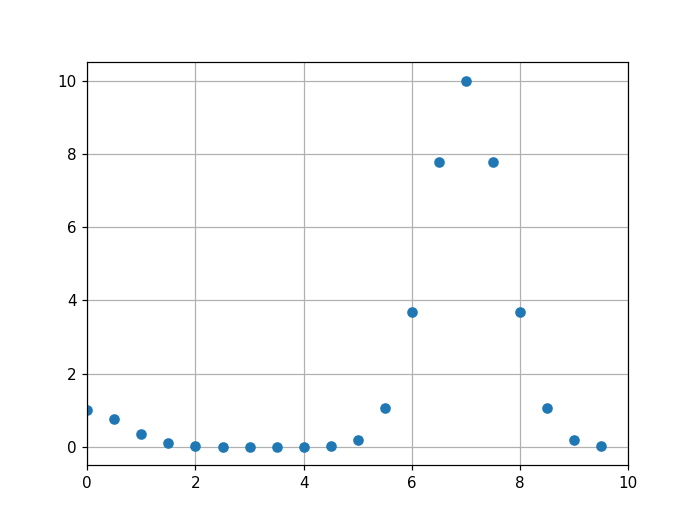

([0.0,
  0.5,
  1.0,
  1.5,
  2.0,
  2.5,
  3.0,
  3.5,
  4.0,
  4.5,
  5.0,
  5.5,
  6.0,
  6.5,
  7.0,
  7.5,
  8.0,
  8.5,
  9.0,
  9.5],
 [1.0,
  0.7788007830714049,
  0.36787944117144467,
  0.10539922456259311,
  0.018315639027613618,
  0.0019304701885082612,
  0.00012453515583387215,
  5.2636291313419095e-05,
  0.0012342105760415147,
  0.019304542967505146,
  0.18315638890122973,
  1.053992245618716,
  3.678794411714424,
  7.788007830714049,
  10.0,
  7.788007830714049,
  3.6787944117144233,
  1.0539922456186432,
  0.1831563888873418,
  0.01930454136227709])

In [5]:
import matplotlib.pyplot as plt
plt.ion()
class DynamicUpdate():
    #Suppose we know the x range
    min_x = 0
    max_x = 10

    def on_launch(self):
        #Set up plot
        self.figure, self.ax = plt.subplots()
        self.lines, = self.ax.plot([],[], 'o')
        #Autoscale on unknown axis and known lims on the other
        self.ax.set_autoscaley_on(True)
        self.ax.set_xlim(self.min_x, self.max_x)
        #Other stuff
        self.ax.grid()
        ...

    def on_running(self, xdata, ydata):
        #Update data (with the new _and_ the old points)
        self.lines.set_xdata(xdata)
        self.lines.set_ydata(ydata)
        #Need both of these in order to rescale
        self.ax.relim()
        self.ax.autoscale_view()
        #We need to draw *and* flush
        self.figure.canvas.draw()
        self.figure.canvas.flush_events()

    #Example
    def __call__(self):
        import numpy as np
        import time
        self.on_launch()
        xdata = []
        ydata = []
        for x in np.arange(0,10,0.5):
            xdata.append(x)
            ydata.append(np.exp(-x**2)+10*np.exp(-(x-7)**2))
            self.on_running(xdata, ydata)
            time.sleep(1)
        return xdata, ydata

d = DynamicUpdate()
d()